In [8]:
import pandas, importlib
import matplotlib.pyplot as plt

import countsColumnsNaming
import vennMaker
import peaksList
import heatmap
import utils

rl = importlib.reload
rl(vennMaker)
rl(peaksList)
rl(heatmap)
rl(utils)


<module 'utils' from '/Users/dfporter/Desktop/macbook_air_Desktop/shared/sp_oo/FBF_gendered_gl/cliputil/utils.py'>

Was able to read biotypes from peaks files.
From Nobel et al., loaded 6655 SP genes, 9415 OO genes, and 12839 total GL genes.
There are 2114 targets in SP or OO germlines. There are
 12730 RNAs in a SP or OO program. 2084 (16.3%) of those are targets in the SP or
 OO FBF datasets.
        
only targ 30. only oo prog 4491 only sp prog 3348. 
 targ+oo 1612 targ+sp 60 not targ but sp+oo 2807. targ+sp+oo 412
The peaks file and gtf agreed on the biotypes of 2114 RNAs, and disagreed on 0
The disagreements were: 
---
2114 RNAs were targets in SP or OO germlines.
Among those, 410 (19.4%) were OO only, 592 (28.0%) were SP only, and 1112 (52.6%) were shared.

For mRNA:
---
2069 RNAs were targets in SP or OO germlines.
Among those, 395 (19.1%) were OO only, 582 (28.1%) were SP only, and 1092 (52.8%) were shared.


For ncRNA:
---
45 RNAs were targets in SP or OO germlines.
Among those, 15 (33.3%) were OO only, 10 (22.2%) were SP only, and 20 (44.4%) were shared.




'Among the 2379 total FBF targets, 2326 were mRNAs and 53 were non-coding RNAs. \nFor mRNA targets, 1281 were common (55%), 624 were spermatogenic- specific (27%), \nand 421 were oogenic-specific (18%); for non-coding RNA targets, 25 were common (53%), \n13 were spermatogenic- specific (25%), and 15 were oogenic-specific (28%).\n'

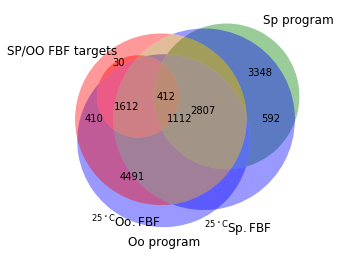

In [9]:
prefix = '../v2/combined_filtered/'

fname_to_label = {
prefix + 'old_fbf2.txt': 'old_fbf2',
prefix + 'old_fbf1.txt': 'old_fbf1',
prefix + 'oo_both.txt': 'oo_both',
prefix + 'oo_fbf1.txt': 'oo_fbf1',
prefix + 'oo_fbf2.txt': 'oo_fbf2',
prefix + 'sp_both.txt': 'sp_both',
prefix + 'sp_fbf1.txt': 'sp_fbf1',
prefix + 'sp_fbf2.txt': 'sp_fbf2',
#prefix + 'old_fbf1_to_fbf2_n2.txt': 'old_fbf1_to_fbf2_n2',
}
label_to_fname = dict(zip(fname_to_label.values(), fname_to_label.keys()))

v = vennMaker.vennMaker()
v.load_peaks_csv_files(label_to_fname)

pk = peaksList.peaksList(dataframe=pandas.read_csv(
        '../v2/combined_filtered/oo_both.txt', sep='\t', index_col=False))
pk.read_sp_vs_oo_as_programs()
programs = pk.programs_as_public_names()

fig, ax = plt.subplots()
v.programs_vs_combined_sp_oo(ax, programs)
v.compare_biotypes_assignments()
v.oo_vs_sp(ax, programs)

"""Among the 2379 total FBF targets, 2326 were mRNAs and 53 were non-coding RNAs. 
For mRNA targets, 1281 were common (55%), 624 were spermatogenic- specific (27%), 
and 421 were oogenic-specific (18%); for non-coding RNA targets, 25 were common (53%), 
13 were spermatogenic- specific (25%), and 15 were oogenic-specific (28%).
"""

In [5]:
import heatmap
rl(heatmap)

hm = heatmap.heatmapMaker()

hm.load_peaks_csv_files(label_to_fname)
# load_csvs_of_targets() sets:
# self.df (dict of dfs) and self.targs (dict of gene name sets)

hm.load_counts(fname='../combined_counts.txt')#, only_combined_datasets=True)


Was able to read biotypes from peaks files.
RNA genes: 6
['rrn-4.5', 'rrn-3.56', 'rrn-2.1', 'rrn-4.16', 'rrn-3.1', 'rrn-4.15']

heatmap.rm_non_target_rnas(): self.targs.keys():  dict_keys(['old_fbf2', 'old_fbf1', 'oo_both', 'oo_fbf1', 'oo_fbf2', 'sp_both', 'sp_fbf1', 'sp_fbf2', 'old_fbf1_to_fbf2_n2'])
Targets in peaks files:  2379
Kept 2374 targets
all_targ  2379
Targets here but not in self.targs:  set()
Targets in self.targs but not here:  {'C41C4.19', 'F41E6.18', 'C41C4.17', 'R144.18', 'D2092.15'}
['ncRNA', 'ncRNA', 'ncRNA', 'ncRNA', 'ncRNA', 'ncRNA', 'protein_coding', 'protein_coding', 'protein_coding', 'protein_coding']
biotypes peaks in SP/OO (from gtf, not peaks file.):
---
Sum  2379
defaultdict(<class 'int'>, {'protein_coding': 2326, 'pseudogene': 16, 'ncRNA': 17, 'snRNA': 1, 'snoRNA': 9, 'piRNA': 1, 'tRNA': 5, 'lincRNA': 4})
biotypes from counts file (from gtf):
---
Sum  2374
defaultdict(<class 'int'>, {'protein_coding': 2326, 'pseudogene': 16, 'ncRNA': 15, 'snRNA': 1, 'snoRNA

In [7]:
#print(hm.counts_df)
"""Among the 2379 total FBF targets, 2326 were mRNAs and 53 were non-coding RNAs. 
For mRNA targets, 1281 were common (55%), 624 were spermatogenic- specific (27%), 
and 421 were oogenic-specific (18%); for non-coding RNA targets, 25 were common (53%), 
13 were spermatogenic- specific (25%), and 15 were oogenic-specific (28%).
"""
print(pandas.DataFrame.from_dict(hm.biotypes, 'index')[0].value_counts())
print(hm.counts_df.loc['C04G2.3'])
print(hm.df['oo_both']['biotype'].value_counts())
print(hm.counts_df)

protein_coding    3414
pseudogene          36
ncRNA               27
snoRNA              15
piRNA               11
lincRNA              7
tRNA                 7
snRNA                5
rRNA                 1
miRNA                1
Name: 0, dtype: int64
SP FBF_1     4.993284
OO FBF_1    -2.000000
LT FBF2_1   -2.000000
OO FBF_2    -2.000000
LT FBF1_1   -2.000000
LT FBF1_2   -2.000000
SP FBF_2     2.640232
SP FBF_3     6.077889
LT FBF2_2   -2.000000
LT FBF1_3   -2.000000
OO FBF_3    -2.000000
LT FBF2_3   -2.000000
Name: C04G2.3, dtype: float64
protein_coding    2087
pseudogene          18
ncRNA               16
snoRNA               8
tRNA                 5
lincRNA              4
snRNA                1
Name: biotype, dtype: int64


In [17]:
import collections
def transl(self, gtfname='/opt/lib/gtf_with_names_column.txt'):
    gtf = pandas.read_csv(gtfname, sep='\t')
    self.wbid_to_name = collections.defaultdict(str)
    self.wbid_to_name.update(dict(zip(gtf['gene_id'].tolist(), gtf['gene_name'].tolist())))
    self.name_to_wbid = collections.defaultdict(str)
    self.name_to_wbid.update(dict(zip(gtf['gene_name'].tolist(), gtf['gene_id'].tolist())))
    self.name_to_biotype = dict(zip(gtf['gene_name'].tolist(), gtf['biotype'].tolist()))
def add_biotype(self, gtfname):
    if not hasattr(self, 'name_to_biotype'):
        transl(self, gtfname)
    self.counts_df['biotype'] = [ self.name_to_biotype.get(x, '') for x in self.counts_df.index ]
add_biotype(hm, '/opt/lib/gtf_with_names_column.txt')

In [18]:
print(hm.counts_df['biotype'].value_counts())
print(len(hm.counts_df.index))

protein_coding    18295
ncRNA              2912
piRNA              2666
pseudogene          974
tRNA                579
snoRNA              290
lincRNA             150
miRNA               149
snRNA                91
antisense            76
rRNA                  2
                      2
Name: biotype, dtype: int64
26186


In [21]:
print(pk.df['biotype'].value_counts())
print(pk.df['Program'].value_counts())
print(len(pk.df.index))
df = pk.df[pk.df['Program'] == ''].copy()
print(df)

protein_coding    2087
pseudogene          18
ncRNA               16
snoRNA               8
tRNA                 5
lincRNA              4
snRNA                1
Name: biotype, dtype: int64
Oogenic only                 1686
Oogenic and Spermatogenic     412
                               33
Spermatogenic only              8
Name: Program, dtype: int64
2139
     chrm   gene_name  height                         iv      left  max_bin  \
40      V    F41E6.18       0      V:[8615125,8615854)/+   8615125   8209.0   
77      V       sao-1       0    V:[13965297,13965802)/+  13965297   4085.0   
137    II      R166.6       0   II:[10543650,10543744)/-  10543650   2982.0   
145    II    C41C4.17       0     II:[8133004,8133538)/+   8133004   4104.0   
367   III   Y41C4A.29       0  III:[11694748,11695084)/+  11694748   2129.0   
454    IV      gcy-18       0   IV:[12859732,12859827)/+  12859732   3466.0   
491   III      unc-25       0  III:[12942097,12942184)/+  12942097   3294.0   
509    IV 

In [ ]:
"""
Among the 2379 total FBF targets, 2326 were mRNAs and 53 were non-coding RNAs. 
For mRNA targets, 1281 were common (55%), 624 were spermatogenic- specific (27%), 
and 421 were oogenic-specific (18%); for non-coding RNA targets, 
25 were common (53%), 13 were spermatogenic- specific (25%), and 15 were oogenic-specific (28%).
"""